# Convolutional Neural Networks

In [1]:
# Import libraries

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import numpy as np
from scipy import ndimage, misc 

In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [3]:
conv.state_dict()['weight'][0][0] = torch.tensor([[1.0, 0 , -1.0], [2.0, 0, -2.0], [1.0, 0.0, -1.0]])
conv.state_dict()['bias'][0] = 0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [4]:
image = torch.zeros(1, 1, 5, 5)
image[0,0,:,2] = 1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [5]:
z = conv(image)

In [6]:
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [7]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

In [8]:
M=4
image1=torch.ones(1,1,M,M)

In [10]:
# Perform convolution and verify that size is correct

z1 = conv1(image1)
print('z1:', z1)
print('shape:', z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([3, 3])


In [11]:
# Strid paramters

conv3= nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=2)

conv3.state_dict()['weight'][0][0] = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
conv3.state_dict()['bias'][0] = 0.0
conv3.state_dict()['bias'][0] = 0.0

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

In [12]:
# Perform convolution and verify the size

z3 = conv3(image1)

print('z3:', z3)
print('shape:', z3.shape[2:4])

z3: tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([2, 2])


# Zero Padding

In [14]:
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [15]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=3)
conv4.state_dict()['weight'][0][0] = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
conv4.state_dict()['bias'][0] = 0.0
conv4.state_dict()

z4 = conv4(image1)
print('z4:', z4)
print('shape of z4: ', z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)
shape of z4:  torch.Size([1, 1])


In [20]:
# Example

conv5 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=3, padding=1)

conv5.state_dict()['weight'][0][0] = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
conv5.state_dict()['bias'][0] = 0.0
conv5.state_dict()

z5 = conv5(image1)
print('z5:', z5)
print('shape of z5: ', z5.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape of z5:  torch.Size([2, 2])


In [21]:
# Practice Question

Image = torch.randn(1,1,4,4)
Image

tensor([[[[ 0.3609, -0.6988,  0.9869,  0.0129],
          [ 0.1168,  0.3941, -0.8475,  0.4081],
          [ 0.5018,  1.7941,  0.2796,  2.6094],
          [-1.0964, -0.6427,  0.8114, -0.2369]]]])

In [22]:
conv6 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

conv6.state_dict()['weight'][0][0]=torch.tensor([[0,0,0],[0,0,0],[0,0.0,0]])
conv6.state_dict()['bias'][0]=0.0
conv6.state_dict()

OrderedDict([('weight',
              tensor([[[[0., 0., 0.],
                        [0., 0., 0.],
                        [0., 0., 0.]]]])),
             ('bias', tensor([0.]))])

In [23]:
z6 = conv6(Image)
z6

tensor([[[[0., 0.],
          [0., 0.]]]], grad_fn=<ConvolutionBackward0>)

# Activation function and Maax_pooling

In [24]:
# import llibraries

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

In [25]:
# Create a kernel and an image with bias to 0

conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [28]:
image = torch.zeros(1, 1, 5, 5)
image[0,0,:,2] = 1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [29]:
Z = conv(image)
Z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [30]:
# Activation function to activation map

A = torch.relu(Z)
A

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [32]:
relu = nn.ReLU()
relu(Z)

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [33]:
# Max Pooling Example

image1 = torch.zeros(1, 1, 4, 4)

image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

In [38]:
# create a maxpooling obejct in 2d

max1 = nn.MaxPool2d(2, stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

# Multiple Input and Output Channels

In [1]:
# Import libraries

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

Multiple Output Channel

In [3]:
# Create a convolution

conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

# Assigning the values to kernal

Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0] = Gx
conv1.state_dict()['weight'][1][0] = Gy
conv1.state_dict()['weight'][2][0] = torch.ones(3, 3)

conv1.state_dict()['bias'][:] = torch.tensor([0.0, 0.0, 0.0])

In [4]:
# Print out each kernel

for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [5]:
# Create animage

image = torch.zeros(1, 1, 5, 5)
image[0, 0, :, 2] = 1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

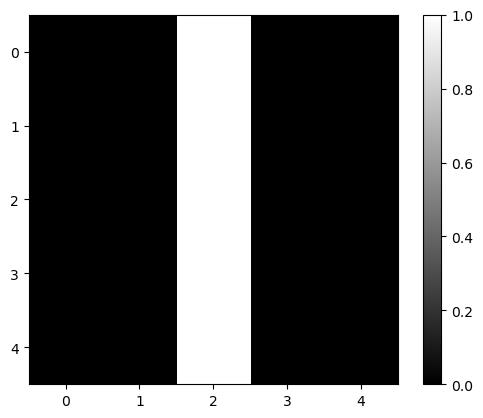

In [11]:
plt.imshow(image[0, 0, :, :].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [12]:
# PERFORM convolution using each kernel

out = conv1(image)

In [13]:
out.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


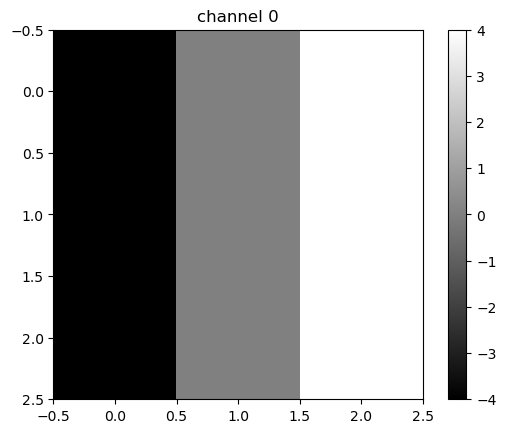

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


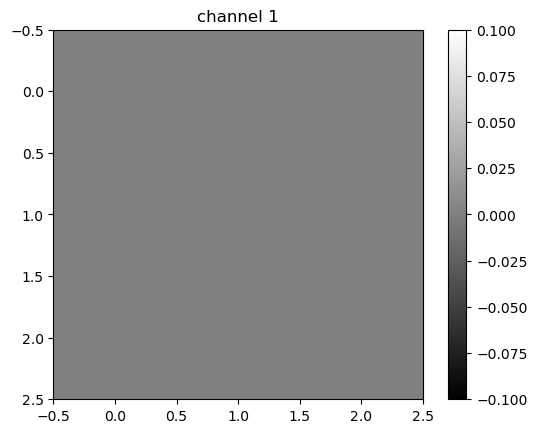

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


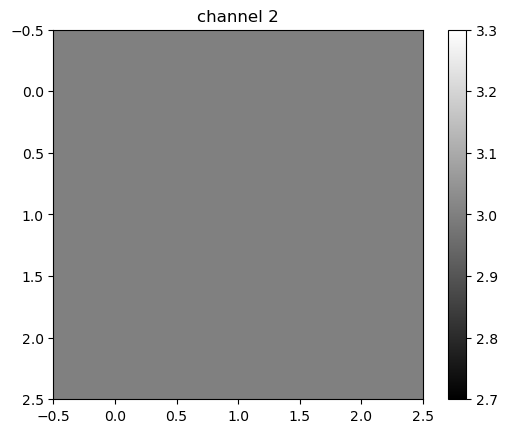

In [14]:
# Print out each channel as tensor or image

for channel, image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title('channel {}'.format(channel))
    plt.colorbar()
    plt.show()

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


<function matplotlib.pyplot.show(close=None, block=None)>

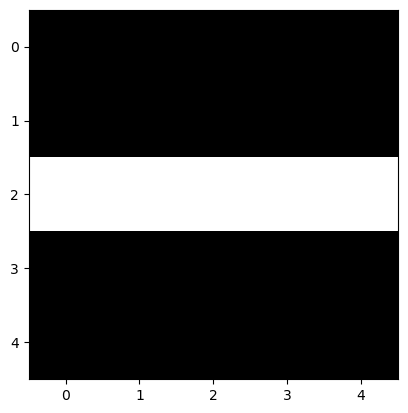

In [15]:
image1 = torch.zeros(1, 1, 5, 5)
image1[0, 0, 2, :] = 1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


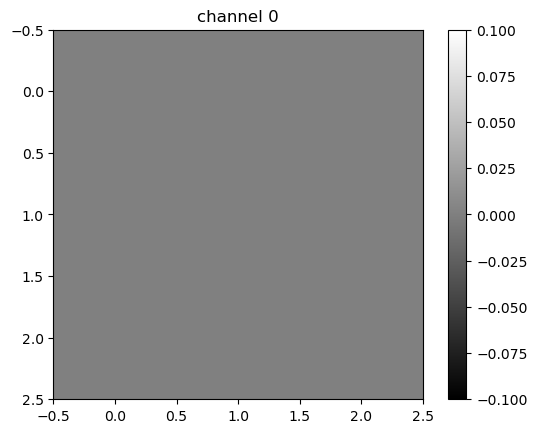

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


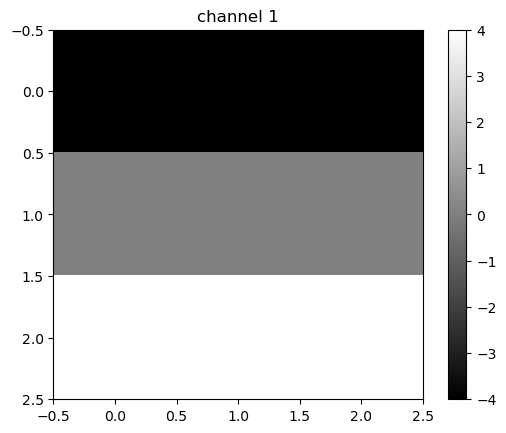

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


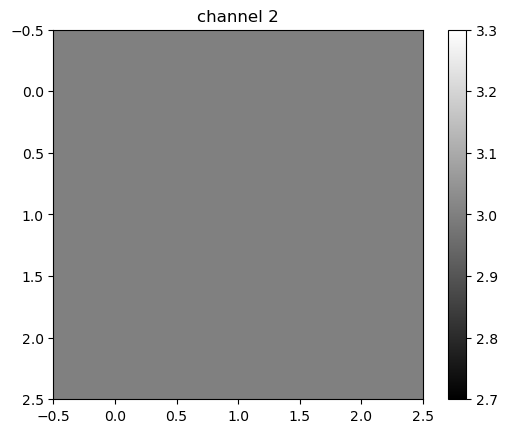

In [16]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Multiple Input Channels

In [17]:
image2 = torch.zeros(1, 2, 5, 5)
image2[0,0,2,:] = -2
image2[0,1,2,:] = 1
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


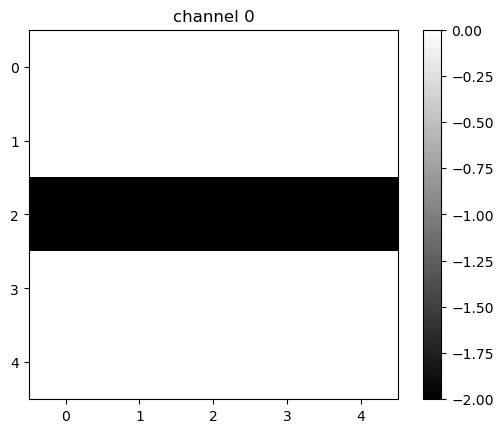

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


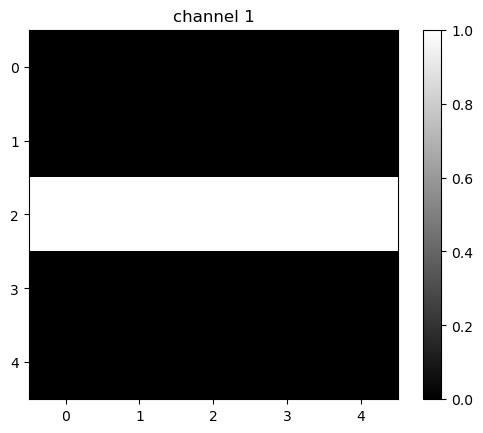

In [18]:
for channel, image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title('channel {}'.format(channel))
    plt.colorbar()
    plt.show()

In [20]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=3)

# assign kernel values
Gx1 = torch.tensor([[0.0, 0.0, 0.0], [0, 1.0, 0], [0.0, 0.0, 0.0]])

conv3.state_dict()['weight'][0][0] = 1 * Gx1
conv3.state_dict()['weight'][0][1] = -2 * Gx1
conv3.state_dict()['bias'][:] = torch.tensor([0.0])

In [21]:
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.,  0.,  0.],
                        [ 0.,  1.,  0.],
                        [ 0.,  0.,  0.]],
              
                       [[-0., -0., -0.],
                        [-0., -2., -0.],
                        [-0., -0., -0.]]]])),
             ('bias', tensor([0.]))])

In [24]:
out2 = conv3(image2)
out2

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

Multiple Input and Multiple Output

In [28]:
# Setting convolution for 3 kernels00

conv4 = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3)

conv4.state_dict()['weight'][0][0] = torch.tensor([[0.0, 0.0, 0.0], [0, 0.5, 0], [0.0, 0.0, 0.0]])
conv4.state_dict()['weight'][0][1] = torch.tensor([[0.0, 0.0, 0.0], [0, 0.5, 0], [0.0, 0.0, 0.0]])

conv4.state_dict()['weight'][1][0] = torch.tensor([[0.0, 0.0, 0.0], [0, 1, 0], [0.0, 0.0, 0.0]])
conv4.state_dict()['weight'][1][1] = torch.tensor([[0.0, 0.0, 0.0], [0, 1, 0], [0.0, 0.0, 0.0]])

conv4.state_dict()['weight'][2][0] = torch.tensor([[1.0, 0.0, -1.0], [2.0, 0, -2.0], [1.0, 0.0, -1.0]])
conv4.state_dict()['weight'][2][1] = torch.tensor([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

# set bias to zero

conv4.state_dict()['bias'][:] = torch.tensor([0.0, 0.0, 0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


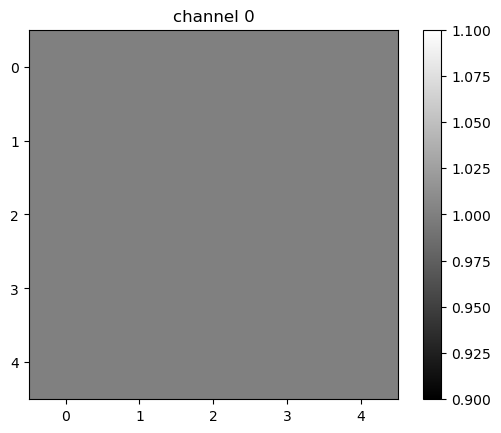

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


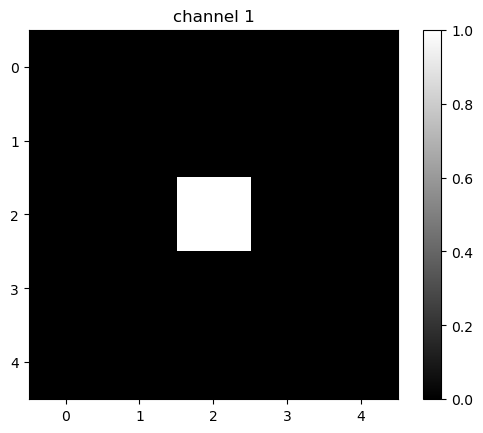

In [32]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [33]:
# Perform convolution

z = conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  2.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 1.0000, 0.5000],
        [0.5000, 0.5000, 0.5000]], grad_fn=<UnbindBackward0>)


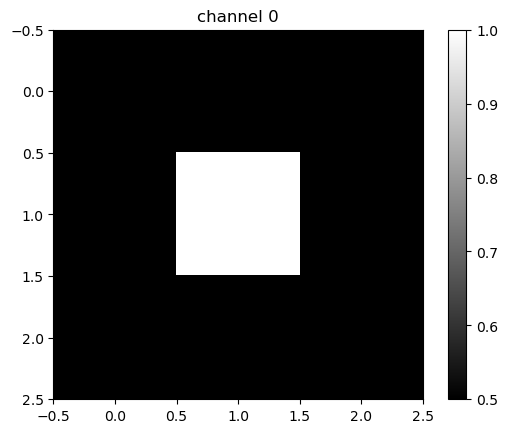

tensor([[1., 1., 1.],
        [1., 2., 1.],
        [1., 1., 1.]], grad_fn=<UnbindBackward0>)


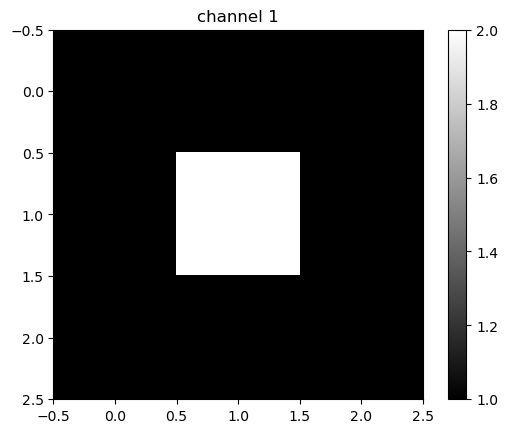

tensor([[-1., -2., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  2.,  1.]], grad_fn=<UnbindBackward0>)


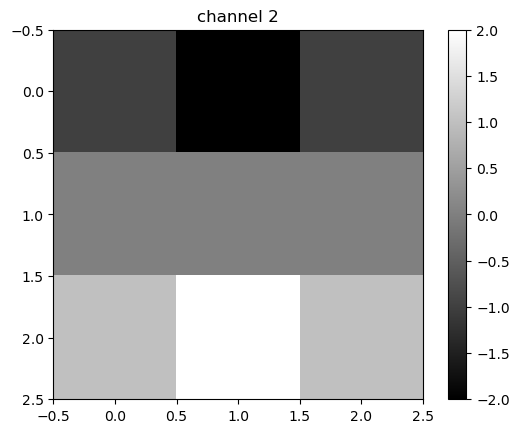

In [34]:
#out1=conv1(image1)
for channel,image in enumerate(z[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

# Practice Questions

In [35]:
imageA=torch.zeros(1,1,5,5)
imageB=torch.zeros(1,1,5,5)
imageA[0,0,2,:]=-2
imageB[0,0,2,:]=1


conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv6 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv5.state_dict()['weight'][0][0]=1*Gx1
conv6.state_dict()['weight'][0][0]=-2*Gx1
conv5.state_dict()['bias'][:]=torch.tensor([0.0])
conv6.state_dict()['bias'][:]=torch.tensor([0.0])

In [36]:
z = conv5(imageA) + conv6(imageB)
z

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<AddBackward0>)

# CNN Simple Example

In [37]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
torch.manual_seed(1729)

In [59]:
# function to plot out the parametres of Convolutional layers

def plot_channels(W):
    n_out = W.shape[0] # no of channels out
    n_in = W.shape[1] # no of channels in 
    w_min = W.min().item()
    w_max = W.max().item()
    
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace = 0.1)
    out_index = 0
    in_index = 0
    
    for ax in axes.flat:
        if in_index > n_in - 1:
            out_index = out_index + 1
            in_index = 0
            
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index += 1
    plt.show()

In [46]:
# functin to plot out data samples

def show_data(dataset, sample):
    plt.imshow(dataset.x[sample, 0, :, :].numpy(), cmap='gray')
    plt.title('y='+str(dataset.y[sample].item()))
    plt.show()

In [47]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self,N_images=100,offset=0,p=0.9, train=False):
        """
        p:portability that pixel is wight  
        N_images:number of images 
        offset:set a random vertical and horizontal offset images by a sample should be less than 3 
        """
        if train==True:
            np.random.seed(1)  
        
        #make images multiple of 3 
        N_images=2*(N_images//2)
        images=np.zeros((N_images,1,11,11))
        start1=3
        start2=1
        self.y=torch.zeros(N_images).type(torch.long)

        for n in range(N_images):
            if offset>0:
        
                low=int(np.random.randint(low=start1, high=start1+offset, size=1))
                high=int(np.random.randint(low=start2, high=start2+offset, size=1))
            else:
                low=4
                high=1
        
            if n<=N_images//2:
                self.y[n]=0
                images[n,0,high:high+9,low:low+3]= np.random.binomial(1, p, (9,3))
            elif  n>N_images//2:
                self.y[n]=1
                images[n,0,low:low+3,high:high+9] = np.random.binomial(1, p, (3,9))
           
        
        
        self.x=torch.from_numpy(images).type(torch.FloatTensor)
        self.len=self.x.shape[0]
        del(images)
        np.random.seed(0)
    def __getitem__(self,index):      
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [42]:
def plot_activations(A,number_rows= 1,name=""):
    A=A[0,:,:,:].detach().numpy()
    n_activations=A.shape[0]
    
    
    print(n_activations)
    A_min=A.min().item()
    A_max=A.max().item()

    if n_activations==1:

        # Plot the image.
        plt.imshow(A[0,:], vmin=A_min, vmax=A_max, cmap='seismic')

    else:
        fig, axes = plt.subplots(number_rows, n_activations//number_rows)
        fig.subplots_adjust(hspace = 0.4)
        for i,ax in enumerate(axes.flat):
            if i< n_activations:
                # Set the label for the sub-plot.
                ax.set_xlabel( "activation:{0}".format(i+1))

                # Plot the image.
                ax.imshow(A[i,:], vmin=A_min, vmax=A_max, cmap='seismic')
                ax.set_xticks([])
                ax.set_yticks([])
    plt.show()

In [43]:

def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [44]:
# Prepare data

N_images = 10000
train_dataset = Data(N_images=N_images, train=True)
validation_dataset = Data(N_images=1000, train=False)

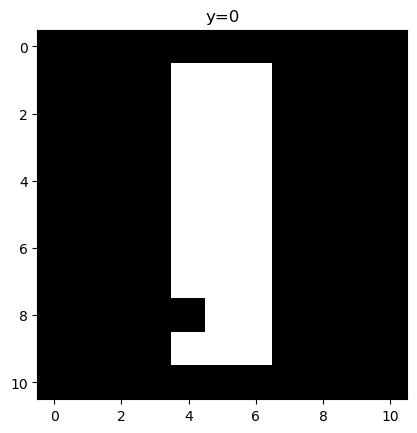

In [49]:
# data visualization

show_data(train_dataset, 0)

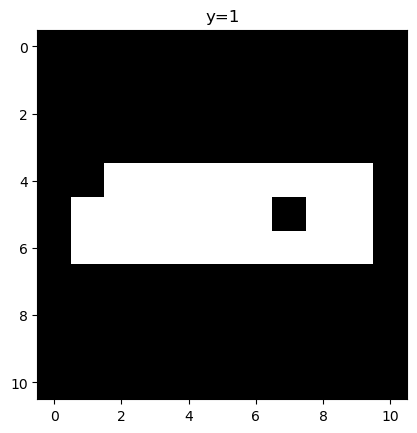

In [50]:
show_data(train_dataset,N_images//2+2)

Building a Convolutional Neural Network

In [53]:
out = conv_output_shape((11, 11), kernel_size=2, stride=1, pad=0, dilation=1)
print(out)
out1 = conv_output_shape(out, kernel_size=2, stride=1, pad=0, dilation=1)
print(out1)
out2 = conv_output_shape(out1, kernel_size=2, stride=1, pad=0, dilation=1)
print(out2)
out3 = conv_output_shape(out2, kernel_size=2, stride=1, pad=0, dilation=1)
print(out3)

(10, 10)
(9, 9)
(8, 8)
(7, 7)


In [74]:
class CNN(nn.Module):
    def __init__(self, out_1=2, out_2=1):
        super(CNN, self).__init__()
        # First Convolutional layer
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=2, padding=0)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=1)
        
        # Second Convolutional layer
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=2, stride=1, padding=0)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=1)
        
        # Fully connected layer
        self.fc1 = nn.Linear(out_2 * 7 * 7, 2)
        
    def forward(self, x):
        # First CL
        x = self.cnn1(x)
        # activation fun
        x = torch.relu(x)
        # max pooling
        x = self.maxpool1(x)
        
        # second CL
        x = self.cnn2(x)
        # activation fun
        x = torch.relu(x)
        # max pooling
        x = self.maxpool2(x)
        
        #flatten output
        x = x.view(x.size(0), -1)
        
        # fully connected layer
        x = self.fc1(x)
        
        return x
    
    def activations(self, x):
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(x)
        a2 = torch.relu(z2)
        out = self.maxpool2(a2)
        out = out.view(out.size(0), -1)
        return z1, a1, z2, a2, out

In [56]:
# model
model = CNN(2,1)
model

CNN(
  (cnn1): Conv2d(1, 2, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(2, 1, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=49, out_features=2, bias=True)
)

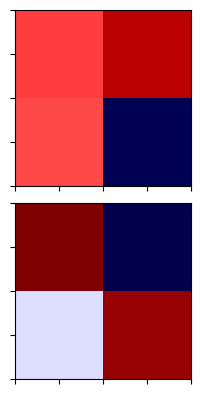

In [60]:
plot_channels(model.state_dict()['cnn1.weight'])

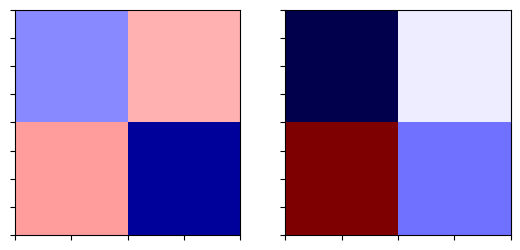

In [61]:
plot_channels(model.state_dict()['cnn2.weight'])

In [65]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [63]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=20)

 Train the model and determine the accuracy

In [66]:
n_epochs = 10
cost_list = []
accuracy_list = []
N_test = len(validation_dataset)
cost = 0

for epoch in range(n_epochs):
    cost = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost += loss.item()
    cost_list.append(cost)
    
    correct = 0
    for x_test, y_test  in validation_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        
        correct += (yhat==y_test).sum().item()
        
    accuracy = (correct / N_test)
    
    accuracy_list.append(accuracy)


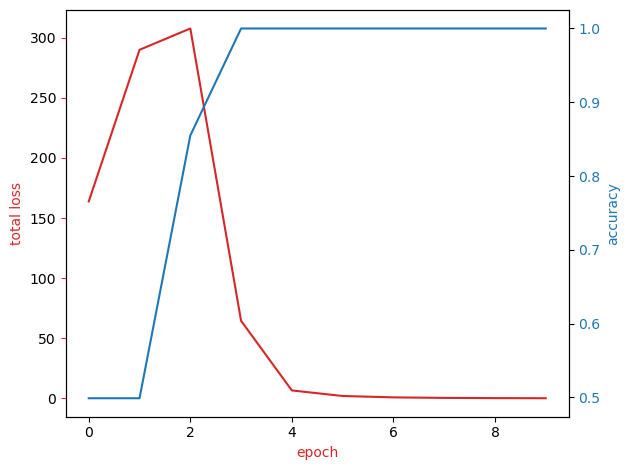

In [67]:
# Analyze the results

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

In [68]:
model.state_dict()['cnn1.weight']

tensor([[[[-0.1874, -0.1209],
          [-0.1913, -0.4264]]],


        [[[ 0.2069, -0.5704],
          [-1.4786, -0.9290]]]])

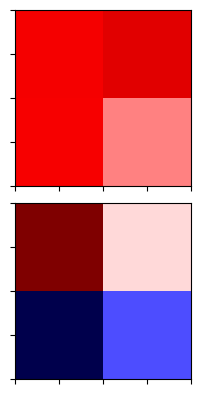

In [69]:
plot_channels(model.state_dict()['cnn1.weight'])

In [70]:
model.state_dict()['cnn1.weight']

tensor([[[[-0.1874, -0.1209],
          [-0.1913, -0.4264]]],


        [[[ 0.2069, -0.5704],
          [-1.4786, -0.9290]]]])

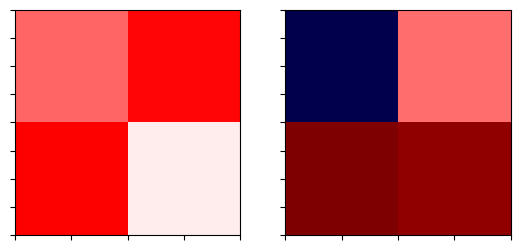

In [71]:
plot_channels(model.state_dict()['cnn2.weight'])

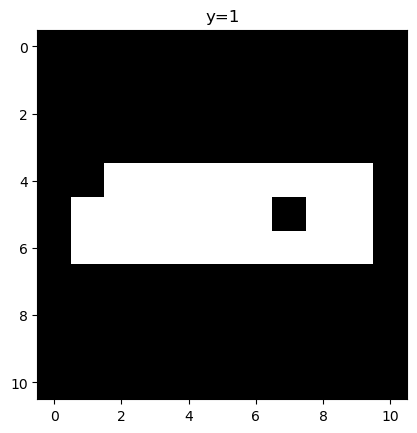

In [72]:
show_data(train_dataset,N_images//2+2)

# CNN WITH MNIST DATASET

In [1]:
# IMport libraries

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to plotting the channel

def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0
    
    for ax in axes.flat:
        if in_index > n_in - 1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()

In [3]:
# Define the function for plotting the parameters

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

In [4]:
# Define the function for plotting the activations

def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace = 0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [12]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))#.item()))

In [6]:
# get the data
IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [8]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [10]:
# Show the data type for each element in dataset

train_dataset[0][1]

5

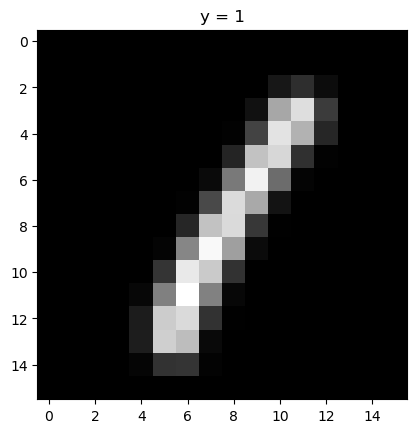

In [13]:
# The image for the fourth data element
show_data(train_dataset[3])

In [14]:
# Building a Convolutional Neural Network class

class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

In [15]:
# create model
model = CNN(out_1=16, out_2=32)

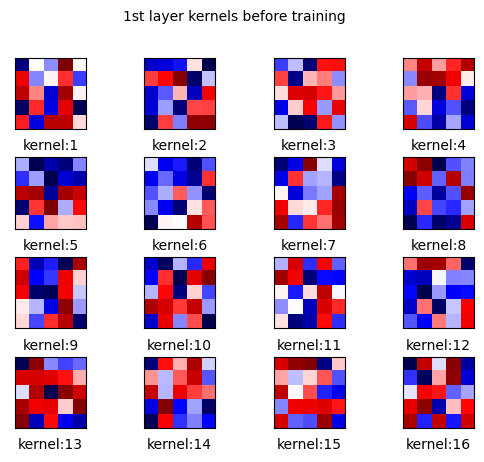

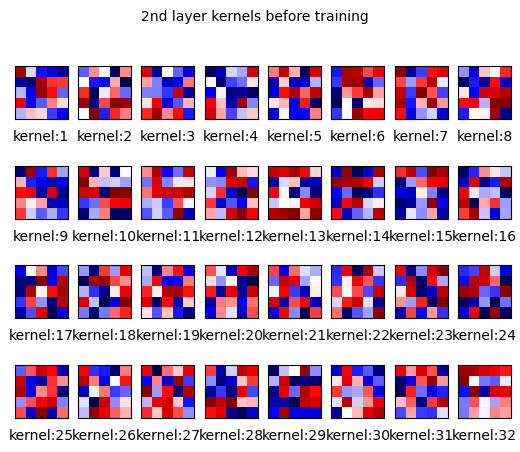

In [16]:
# Plot the parameters

plot_parameters(model.state_dict()['cnn1.weight'], number_rows=4, name="1st layer kernels before training ")
plot_parameters(model.state_dict()['cnn2.weight'], number_rows=4, name='2nd layer kernels before training' )

In [17]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [25]:
# train the model

n_epochs=20
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

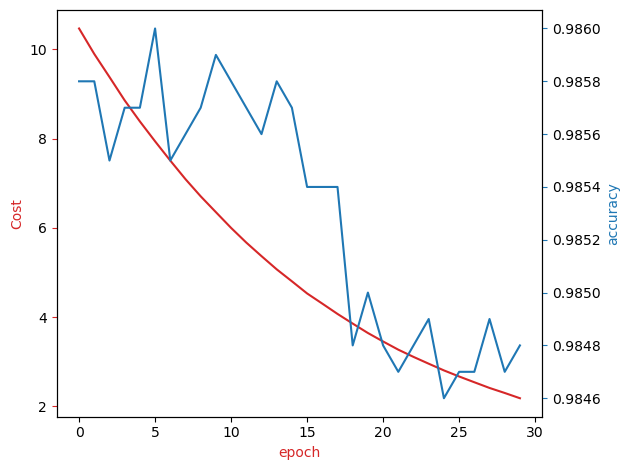

In [24]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

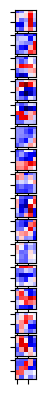

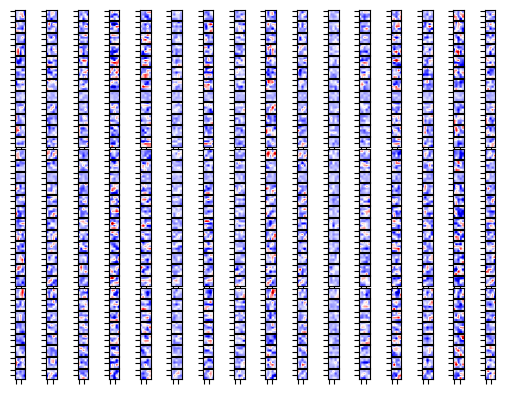

In [26]:
# Plot the channels

plot_channels(model.state_dict()['cnn1.weight'])
plot_channels(model.state_dict()['cnn2.weight'])

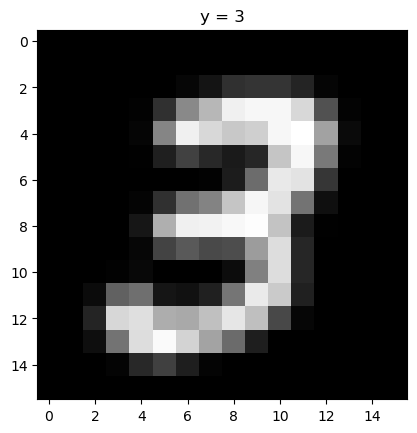

In [29]:
# Show the second image

show_data(train_dataset[7])

In [30]:
# Use the CNN activations class to see the steps

out = model.activations(train_dataset[1][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

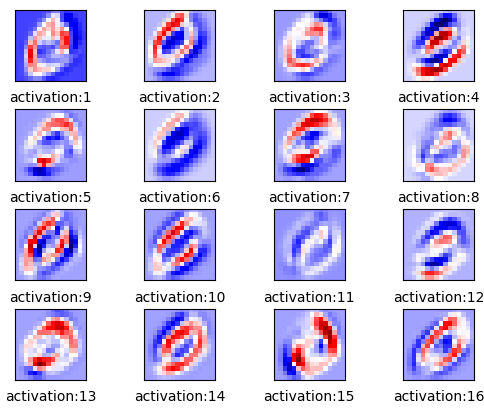

In [31]:
# Plot the outputs after the first CNN

plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

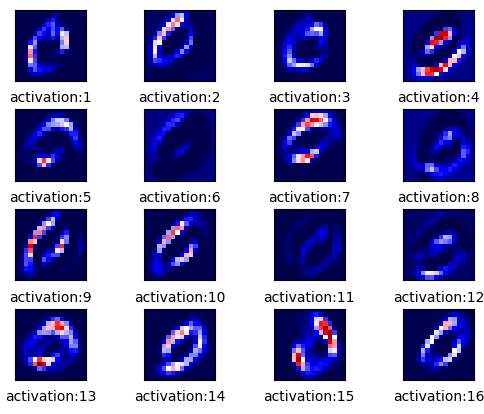

In [32]:
# Plot the outputs after the first Relu

plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

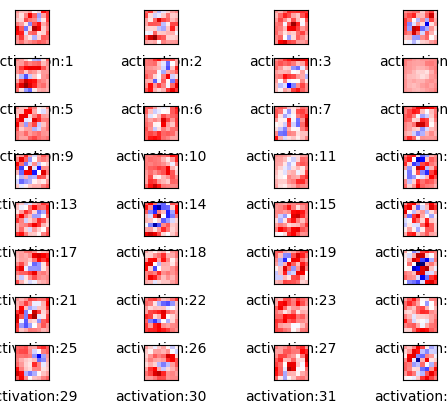

In [33]:
# Plot the outputs after the second CNN

plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

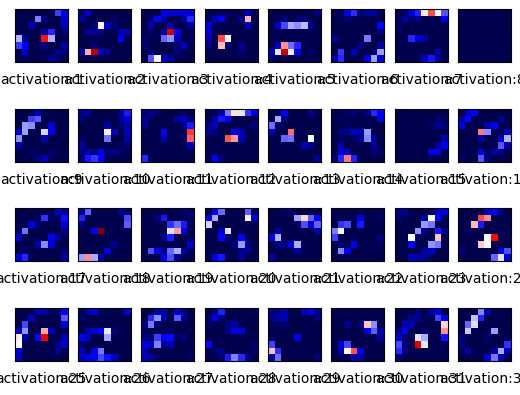

In [34]:
# Plot the outputs after the second Relu

plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

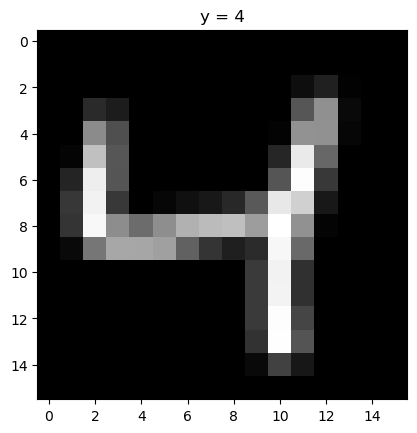

In [35]:
# Show the third image

show_data(train_dataset[2])

In [36]:
# Use the CNN activations class to see the steps

out = model.activations(train_dataset[2][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

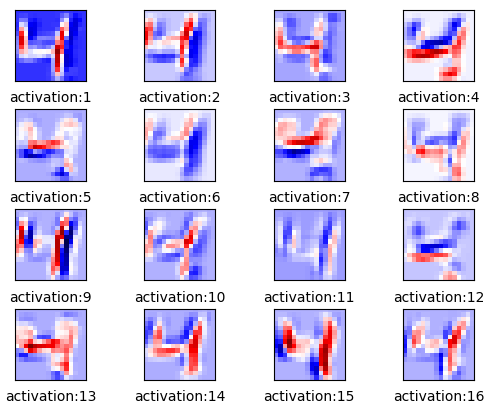

In [37]:
# Plot the outputs after the first CNN

plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

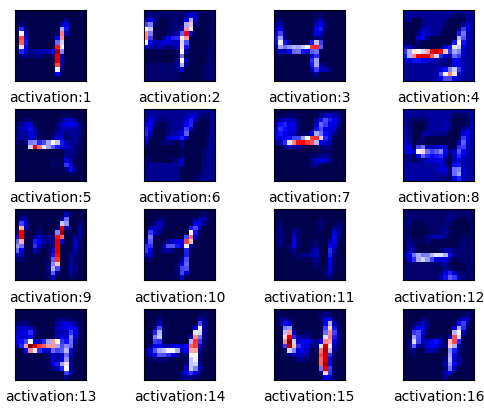

In [38]:
# Plot the outputs after the first Relu

plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

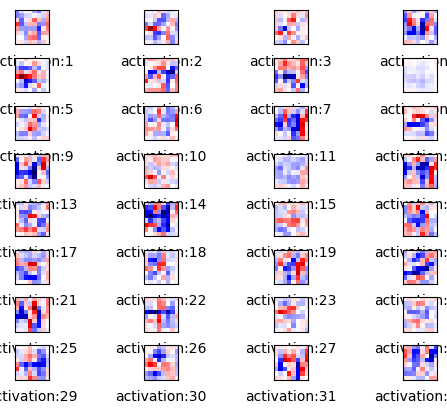

In [39]:
# Plot the outputs after the second CNN

plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

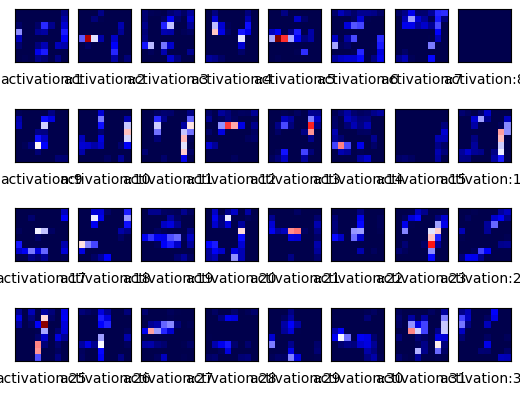

In [40]:
# Plot the outputs after the second Relu

plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

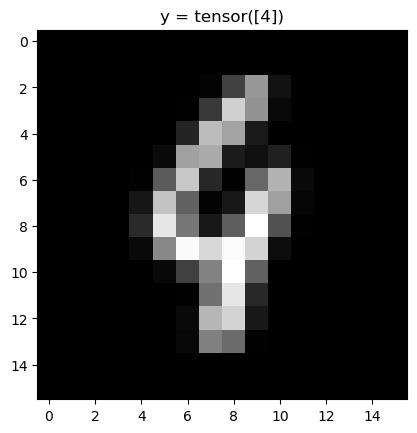

yhat:  tensor([9])


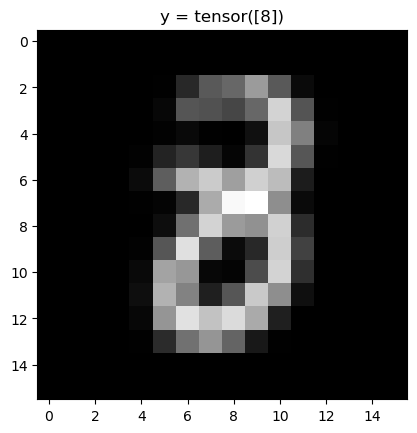

yhat:  tensor([3])


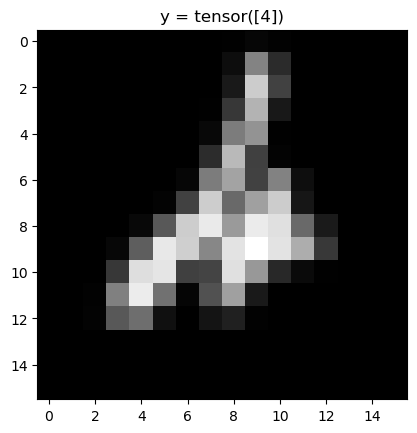

yhat:  tensor([2])


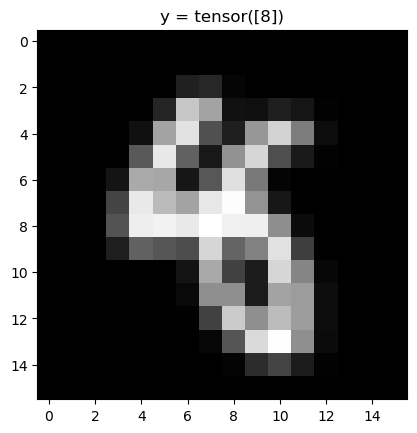

yhat:  tensor([4])


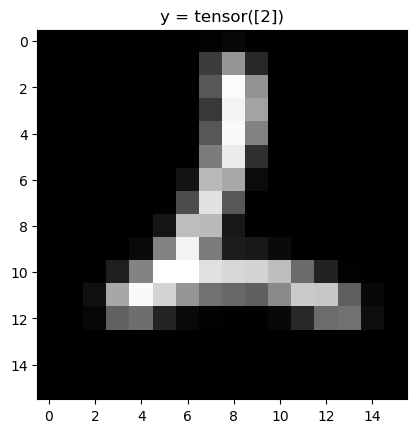

yhat:  tensor([1])


In [41]:
# Plot the mis-classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break  

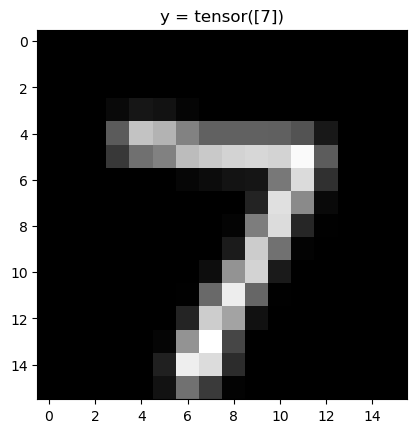

yhat:  tensor([7])


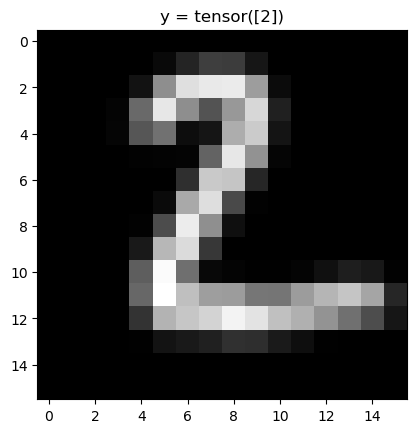

yhat:  tensor([2])


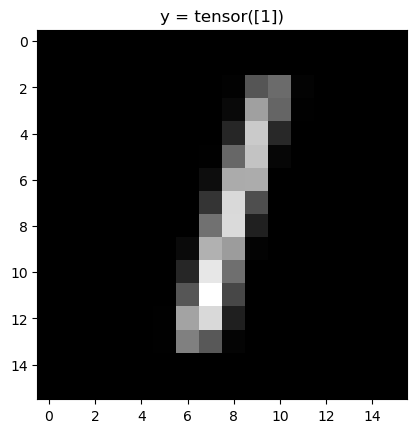

yhat:  tensor([1])


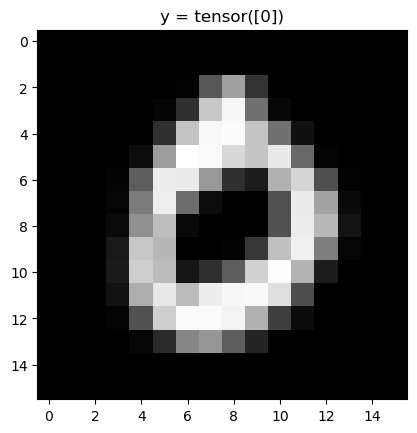

yhat:  tensor([0])


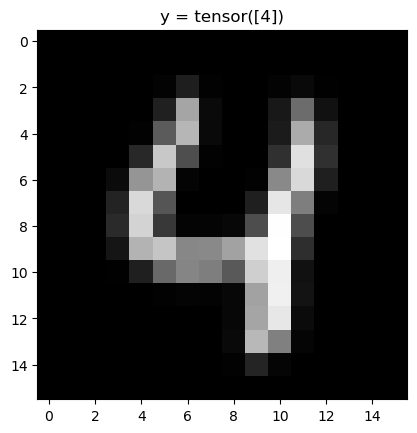

yhat:  tensor([4])


In [42]:
# Plot the classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break  

# Torch Vision Models